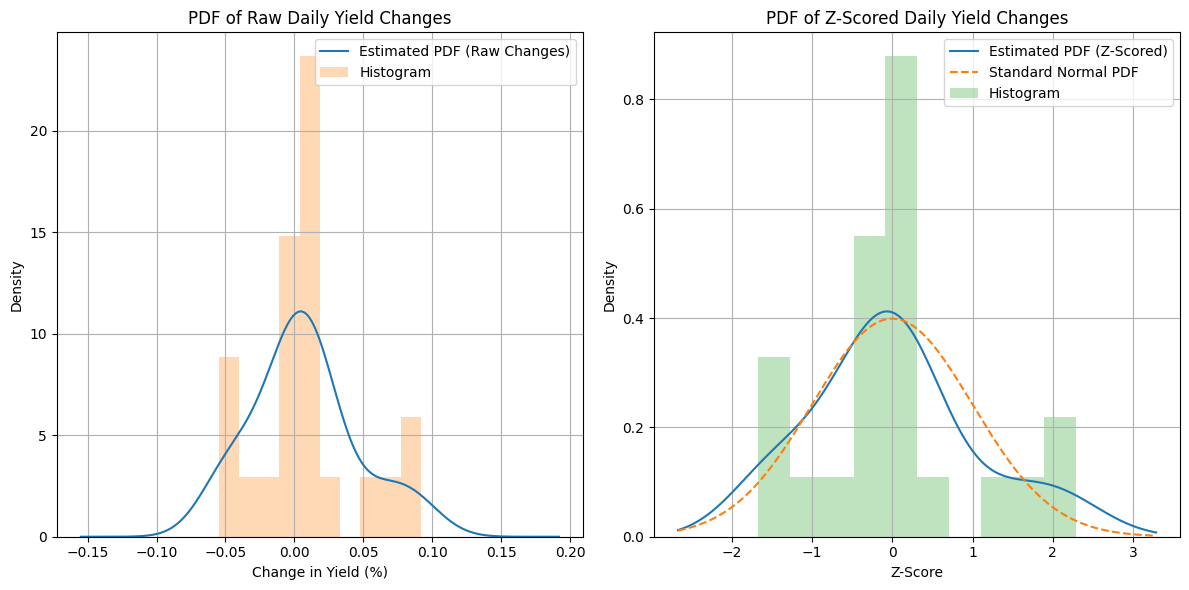

Raw PDF density at 0.16% change: 0.0034167532012682198
Z-scored PDF density at z=4.12: 0.0001268886653336775


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from io import StringIO  # To parse embedded CSV data


# Load data (replace with pd.read_csv('your_file.csv') for your own file)
df = pd.read_csv('bond.csv', parse_dates=['Date'])
df = df.sort_values('Date')  # Ensure chronological order
yields = df['Price'].values  # Yields in %

# Compute daily changes (deltas in percentage points; multiply by 100 for basis points if preferred)
changes = np.diff(yields)  # changes[i] = yields[i+1] - yields[i]

# Estimate PDF using Kernel Density Estimation (KDE)
kde = gaussian_kde(changes)

# Points to evaluate the PDF over
x_raw = np.linspace(min(changes) - 0.1, max(changes) + 0.1, 1000)
pdf_raw = kde(x_raw)

# Z-score normalization (standardize changes to mean=0, std=1)
if len(changes) > 1:  # Need at least 2 points for std
    mean_change = np.mean(changes)
    std_change = np.std(changes)
    z_changes = (changes - mean_change) / std_change
    kde_z = gaussian_kde(z_changes)
    x_z = np.linspace(min(z_changes) - 1, max(z_changes) + 1, 1000)
    pdf_z = kde_z(x_z)

# Plot raw PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_raw, pdf_raw, label='Estimated PDF (Raw Changes)')
plt.hist(changes, density=True, bins=10, alpha=0.3, label='Histogram')
plt.title('PDF of Raw Daily Yield Changes')
plt.xlabel('Change in Yield (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Plot z-scored PDF (for comparison to normal distribution)
if len(changes) > 1:
    plt.subplot(1, 2, 2)
    plt.plot(x_z, pdf_z, label='Estimated PDF (Z-Scored)')
    # Overlay standard normal PDF for comparison
    from scipy.stats import norm
    plt.plot(x_z, norm.pdf(x_z), label='Standard Normal PDF', linestyle='--')
    plt.hist(z_changes, density=True, bins=10, alpha=0.3, label='Histogram')
    plt.title('PDF of Z-Scored Daily Yield Changes')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Example: Evaluate PDF at a specific point (e.g., a 0.16% spike over one day, but note our spike was two-day)
spike = 0.16  # 16 bps = 0.16%
print(f"Raw PDF density at {spike}% change: {kde(spike)[0]}")
if len(changes) > 1:
    z_spike = (spike - mean_change) / std_change
    print(f"Z-scored PDF density at z={z_spike:.2f}: {kde_z(z_spike)[0]}")